<a href="https://colab.research.google.com/github/SooperDoop/ai-examples/blob/master/C0de1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import os
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split 
import pickle
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor

In [0]:
data = datasets.load_iris()
df = pd.DataFrame(data=data.data,columns=data.feature_names)
data = pd.read_csv(r'/content/sample_data/california_housing_test.csv',)

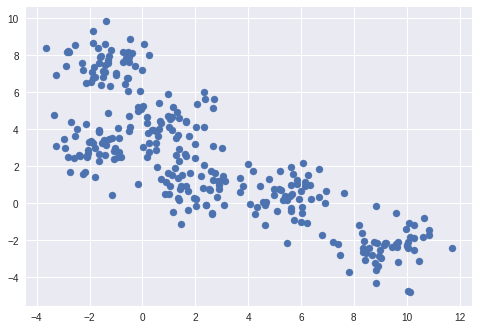

In [23]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=6,
                       cluster_std=0.9, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

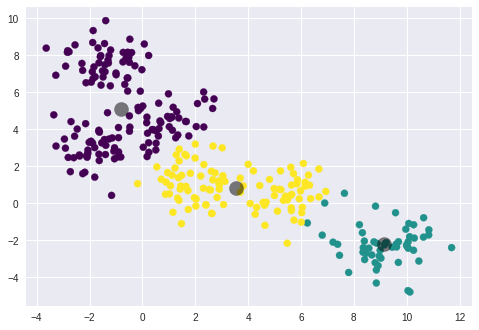

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [0]:
xx = df[['sepal length (cm)','sepal width (cm)']].values

In [0]:
kmean = KMeans(n_clusters=2)
kmean.fit(xx)
yy_means = kmean.predict(xx)

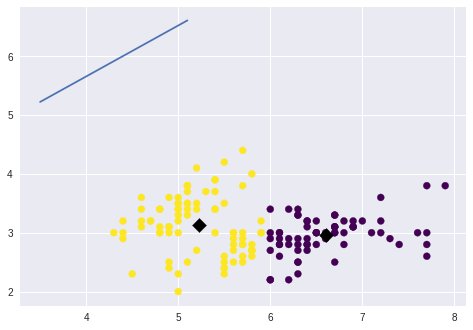

In [79]:
plt.scatter(xx[:,0],xx[:,1],c=yy_means,cmap='viridis')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='k',s=100,marker='D')
# for i in range(len(xx)):
plt.plot(xx[0],kmean.cluster_centers_[:,0])
#   plt.plot(xx[i],kmean.cluster_centers_[:,1])
plt.show()

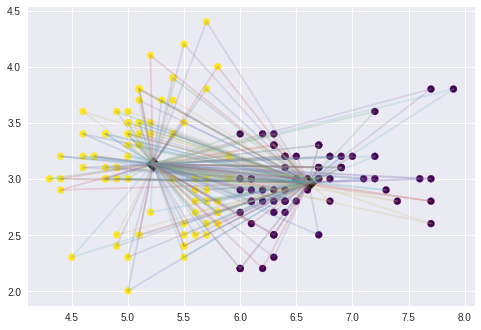

In [121]:
plt.scatter(xx[:,0],xx[:,1],c=yy_means,cmap='viridis')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='k',s=100,marker='D')

# plt.plot([kmean.cluster_centers_[:,0][0],kmean.cluster_centers_[:,1][0]],xx[0],)
for i in xx:
  plt.plot([kmean.cluster_centers_[:,0][0],i[0]],[kmean.cluster_centers_[:,1][0],i[1]],alpha=0.2)
for i in xx:
  plt.plot([kmean.cluster_centers_[:,0][1],i[0]],[kmean.cluster_centers_[:,1][1],i[1]],alpha=0.2)
  
plt.show()

In [0]:
for i in range(0, len(xx), 2):
    plt.plot(xx[i:i+2], xx[i+2:i+4])

In [104]:
[kmean.cluster_centers_[:,0][0],kmean.cluster_centers_[:,1][0]],xx[0]

([6.61044776119403, 2.9656716417910447], array([5.1, 3.5]))

In [117]:
i

array([5.1, 3.5])

In [0]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

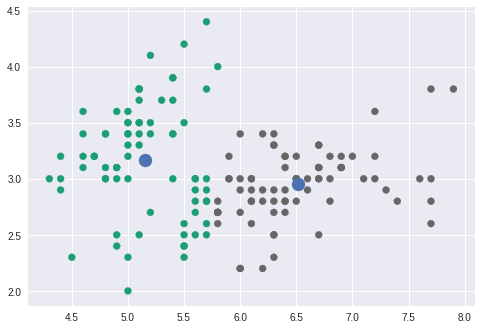

In [129]:
c , l = find_clusters(xx,2)
plt.scatter(xx[:,0],xx[:,1],c=l,cmap='Dark2')
plt.scatter(c[:,0],c[:,1],s=170)

In [0]:
sns.coefplot(data=data,formula=)

TypeError: ignored

In [0]:
model = RandomForestRegressor()
model.fit(data.drop(['population'],axis=1),data['population'])
export_graphviz()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
import tflearn
import tensorflow as tf

In [0]:
from tflearn.datasets import titanic
titanic.download_dataset('titanic_dataset.csv')

# Load CSV file, indicate that the first column represents labels
from tflearn.data_utils import load_csv
data, labels = load_csv('titanic_dataset.csv', target_column=0,
                        categorical_labels=True, n_classes=2)

In [0]:
 data

In [0]:
data[['population']].values

array([[1537.],
       [ 809.],
       [1484.],
       ...,
       [ 693.],
       [  46.],
       [ 753.]])

In [0]:
tf.reset_default_graph()
r2 = tflearn.R2()
net = tflearn.input_data(shape=[None, 8])
net = tflearn.fully_connected(net, 30, activation='linear')
net = tflearn.fully_connected(net, 10, activation = 'linear')
net = tflearn.fully_connected(net, 1, activation = 'linear')
sgd = tflearn.SGD(learning_rate=0.01, lr_decay = 0.01, decay_step=100)
net = tflearn.regression(net, optimizer=sgd, loss='mean_square', metric=r2)
model = tflearn.DNN(net)

model.fit(data.drop(['population'],axis=1).values,data[['population']].values, show_metric=True, validation_set=0.2, shuffle = True, n_epoch=100)

preds_DNN = model.predict(data.drop(['population'],axis=1).values)
plt.figure(figsize=(15,5))
plt.plot(preds_DNN[:100],label='predicted')
plt.plot(data[['population']].values[:100],label = 'actual')
plt.legend()
plt.show()

Training Step: 1937  | total loss: 1684145.50000 | time: 0.249s
| SGD | epoch: 051 | loss: 1684145.50000 - R2: 0.5175 -- iter: 2368/2400


In [0]:
preds_DNN = model.predict(data.drop(['population'],axis=1).valuesb)
plt.figure(figsize=(15,5))
plt.plot(preds_DNN[:100],label='predicted')
plt.plot(data[['population']].values[:100],label = 'actual')
plt.legend()
plt.show()

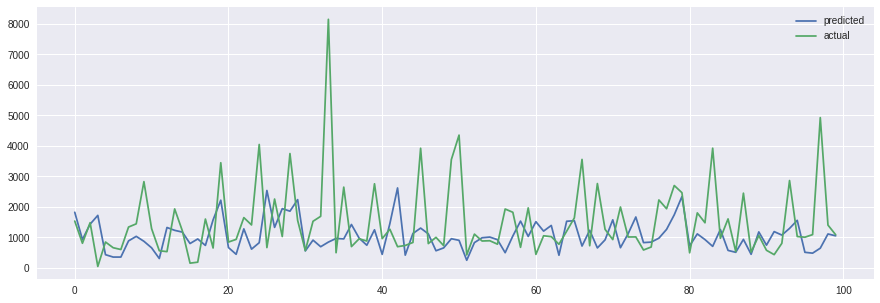

In [0]:
plt.figure(figsize=(15,5))
plt.plot(preds_DNN[:100],label='predicted')
plt.plot(data[['population']].values[:100],label = 'actual')
plt.legend()
plt.show()

In [0]:
net = tflearn.input_data(shape=[3000,8])
net = tflearn.fully_connected(32,activation='linear')
net = tflearn.fully_connected(32,activation='linear')
net = tflearn.fully_connected(1,activation='linear')
net = tflearn.regression(net, optimizer='sgd', loss='mean_square', metric='R2', learning_rate=0.01)
# regression = tflearn.regression(linear, optimizer='sgd', loss='mean_square',
#                                 metric='R2', learning_rate=0.01)
m = tflearn.DNN(net)
m.fit(data.drop(['population'],axis=1).values,data[['population']].values, n_epoch=1000, show_metric=True, snapshot_epoch=False)

TypeError: ignored

In [0]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0


In [0]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
fig = plt.figure(figsize=(12,8))
# fig = sm.graphics.plot_regress_exog(model, "petal length (cm)", fig=fig)
fig = sm.graphics.plot_fit(model, "population", )

In [0]:

x = df['petal length (cm)']
y = df['petal width (cm)']
model = ols("y ~ x",data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.927   
Dependent Variable: y                AIC:                -45.5911
Date:               2019-02-25 10:28 BIC:                -39.5698
No. Observations:   150              Log-Likelihood:     24.796  
Df Model:           1                F-statistic:        1882.   
Df Residuals:       148              Prob (F-statistic): 4.68e-86
R-squared:          0.927            Scale:              0.042636
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.3631    0.0398  -9.1312  0.0000  -0.4417  -0.2845
x              0.4158    0.0096  43.3872  0.0000   0.3968   0.4347
-----------------------------------------------------------------
Omnibus:              5.765        Durbin-Watson:           1.455
Prob(Omnibus):        0.056        Jarque-Bera (JB):        5.555
Skew:                 0.359        Prob(JB):                0.062
Kurtosis:             3.611        Condition No.:           10   
=================================================================

"""

In [0]:
df.columns.values

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

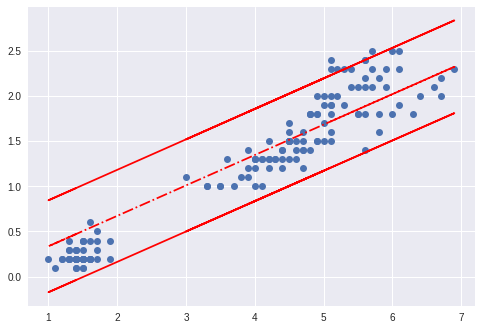

In [0]:
pre_y = model.predict(x)
prstd, iv_l, iv_u = wls_prediction_std(model)
plt.plot(x,y,'o')
plt.plot(x,pre_y,'r-.')
plt.plot(x,iv_l,'r')
plt.plot(x,iv_u,'r')
plt.show()

In [0]:
model = LinearRegression()
model.fit(x.values.reshape(-1,1),y)
prstd, iv_l, iv_u = wls_prediction_std(model)
pre_y = model.predict(x.values.reshape(-1,1))
plt.plot(x,y,'o')
plt.plot(x,pre_y,'r-.')
plt.plot(x,iv_l,'r')
plt.plot(x,iv_u,'r')
plt.show()


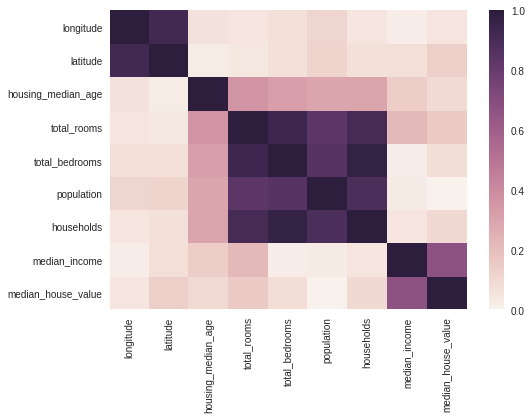

In [0]:
sns.heatmap(data.corr().abs())

In [0]:
data.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

In [0]:
data = pd.read_csv(r'/content/sample_data/california_housing_test.csv',)

In [0]:
model = ols(" population ~ total_rooms + total_bedrooms + households + housing_median_age + housing_median_age + median_house_value",data = data).fit()

In [0]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:               OLS               Adj. R-squared:      0.827     
Dependent Variable:  population        AIC:                 44878.0181
Date:                2019-02-27 07:08  BIC:                 44914.0563
No. Observations:    3000              Log-Likelihood:      -22433.   
Df Model:            5                 F-statistic:         2874.     
Df Residuals:        2994              Prob (F-statistic):  0.00      
R-squared:           0.828             Scale:               1.8341e+05
----------------------------------------------------------------------
                    Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
----------------------------------------------------------------------
Intercept          360.3695  27.9869  12.8764 0.0000 305.4940 415.2450
total_rooms          0.1675   0.0111  15.1179 0.0000   0.1458   0.1892
total_bedrooms      -1.3912   0.0931 -14.9359 0.0000  -1.5738  -1.2086
households           3.1983   0.0896  35.7147 0.0000   3.0227   3.3739
housing_median_age   0.4286   0.6831   0.6275 0.5304  -0.9107   1.7679
median_house_value  -0.0011   0.0001 -15.6733 0.0000  -0.0013  -0.0010
----------------------------------------------------------------------
Omnibus:             2557.716       Durbin-Watson:          2.045     
Prob(Omnibus):       0.000          Jarque-Bera (JB):       244581.956
Skew:                3.518          Prob(JB):               0.000     
Kurtosis:            46.671         Condition No.:          840877    
======================================================================
* The condition number is large (8e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


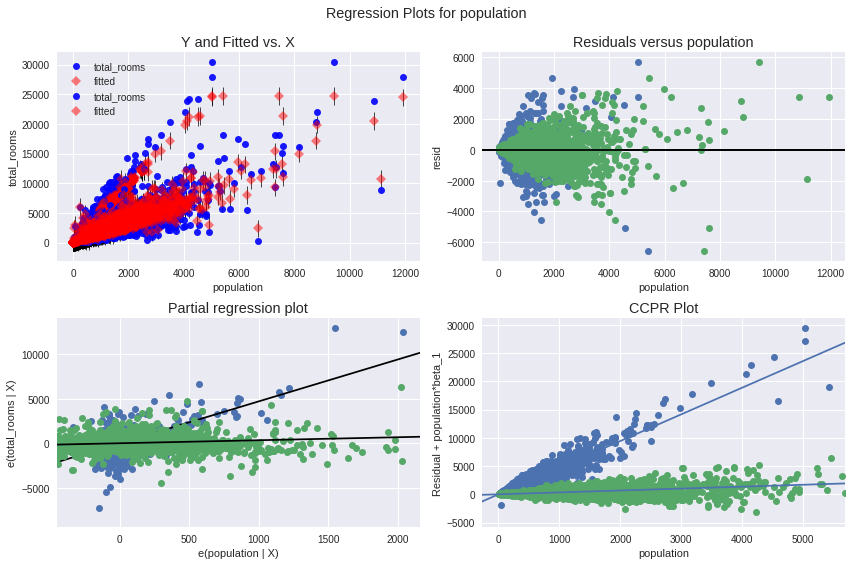

In [0]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "total_bedrooms", fig=fig)
fig = sm.graphics.plot_regress_exog(model, "population", fig=fig)
# fig = sm.graphics.plot_regress_exog(model, "total_rooms", fig=fig)
# fig = sm.graphics.plot_regress_exog(model, "households", fig=fig)
# fig = sm.graphics.plot_fit(model, "population", )

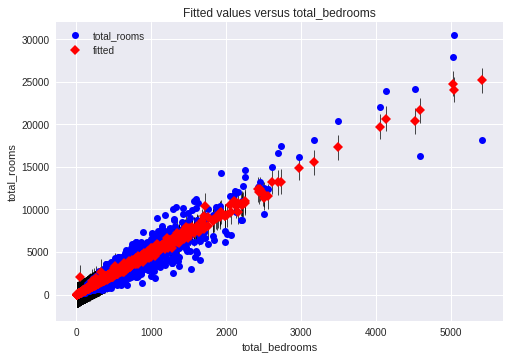

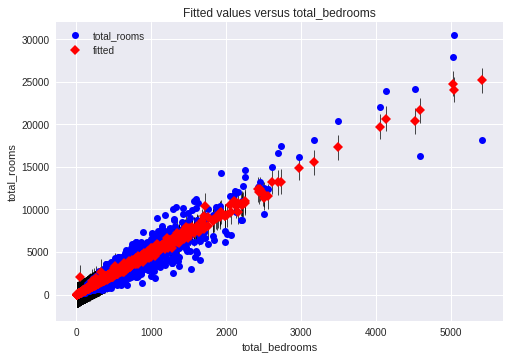

In [0]:
sm.graphics.plot_fit(model, "total_bedrooms", )

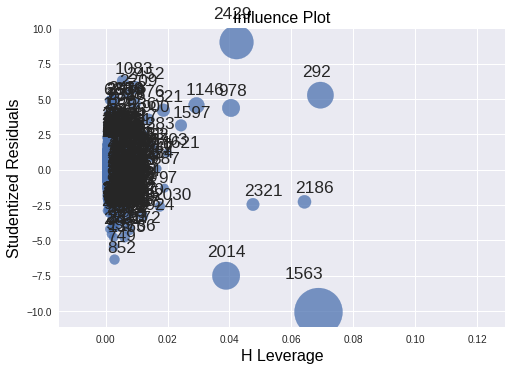

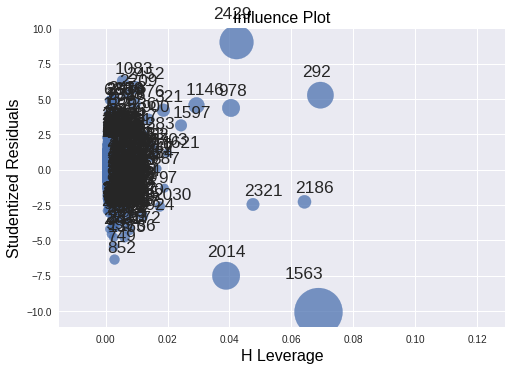

In [0]:
sm.graphics.influence_plot(model, criterion="cooks")

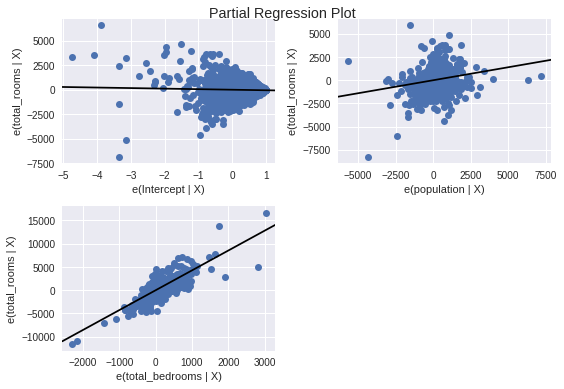

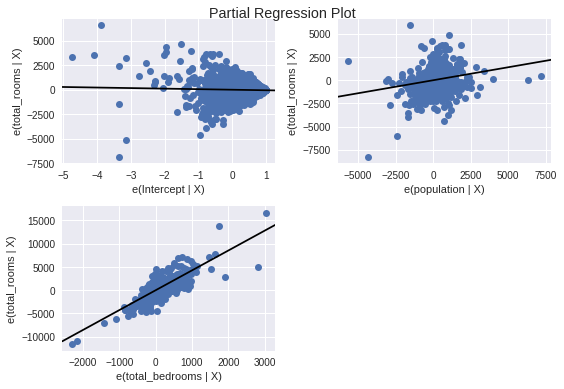

In [0]:
sm.graphics.plot_partregress_grid(model)

In [0]:
model = sm.RLM("total_rooms ~ population + total_bedrooms",data = data).fit()

TypeError: ignored

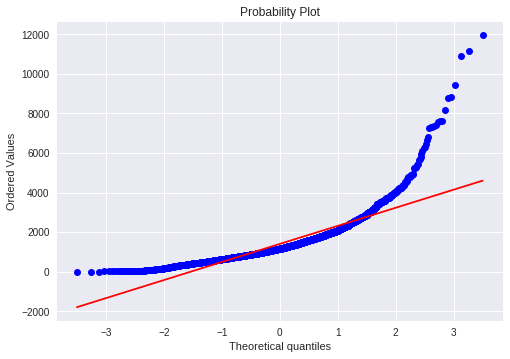

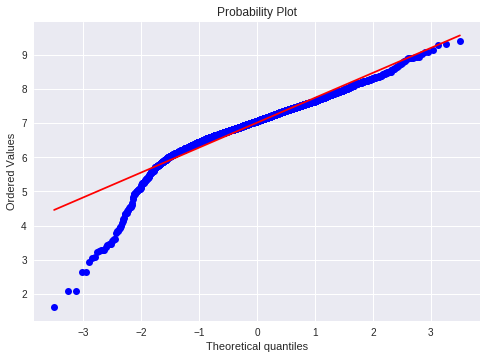

In [0]:
from scipy import stats
stats.probplot(data['population'],plot=plt)
# sns.distplot(data['population'])
plt.show()
stats.probplot(np.log(data['population']),plot=plt)
plt.show()

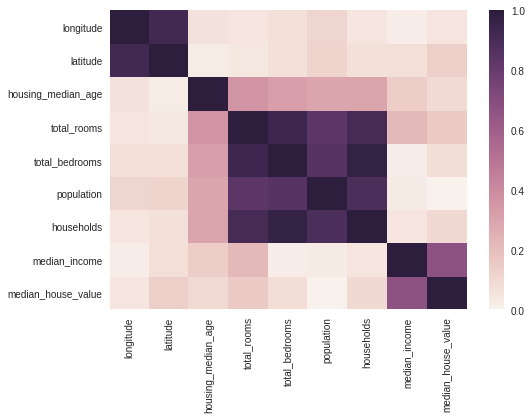

In [0]:
sns.heatmap(data.corr().abs())

In [0]:
data[['latitude','longitude']]

In [0]:
!pip install gmplot 

In [0]:
import gmplot 
  
# GoogleMapPlotter return Map object 
# Pass the center latitude and 
# center longitude 

gmap3 = gmplot.GoogleMapPlotter(34.42,-119.63,13) 

gmap3.scatter( data['latitude'].values, data['longitude'].values, '# FF0000', 
                              size = 40, marker = True ) 
  
# Plot method Draw a line in 
# between given coordinates 
gmap3.plot(data['latitude'].values, data['longitude'].values,
           'cornflowerblue', edge_width = 2.5)
  
# Pass the absolute path 
gmap1.draw( "\\map11.html" ) 


In [0]:
data

NameError: ignored

In [0]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
df.plot.pie(subplots=True,)

In [0]:
df['petal width (cm)']

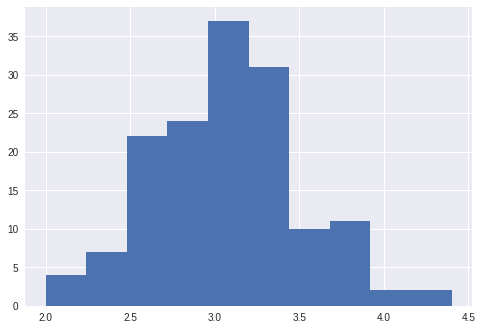

In [0]:
plt.hist(df['sepal width (cm)'])
# plt.legend()
plt.show()

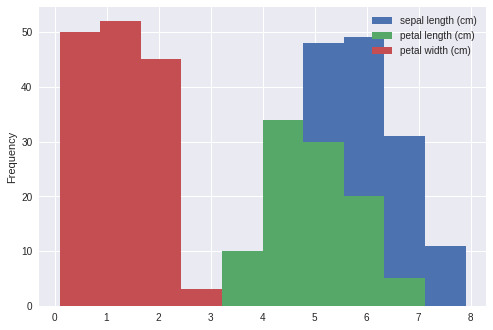

In [0]:
df.plot(kind='hist',x='sepal width (cm)')

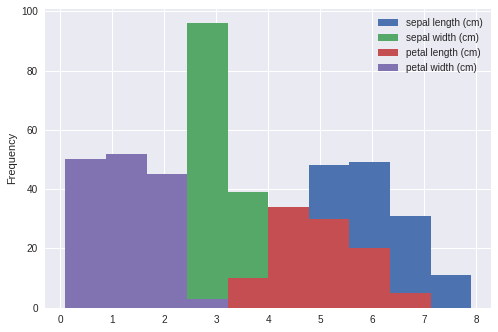

In [0]:
df.plot(kind='hist')

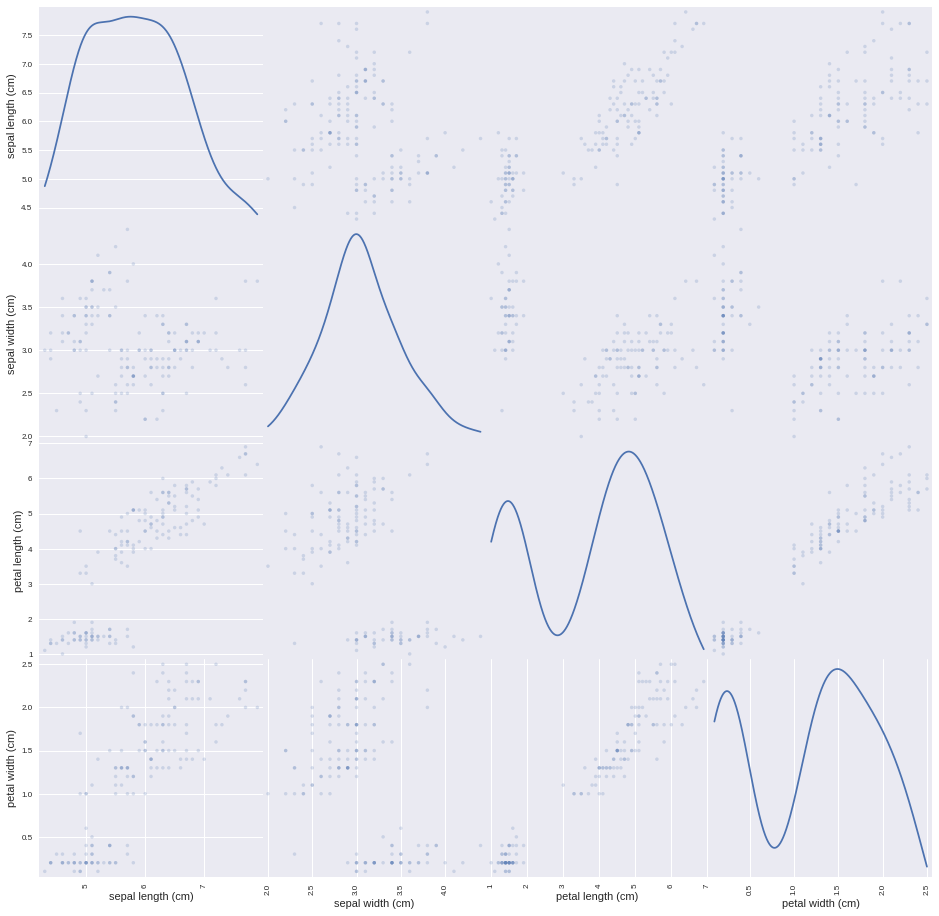

In [0]:
from pandas.plotting import scatter_matrix


scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.show()

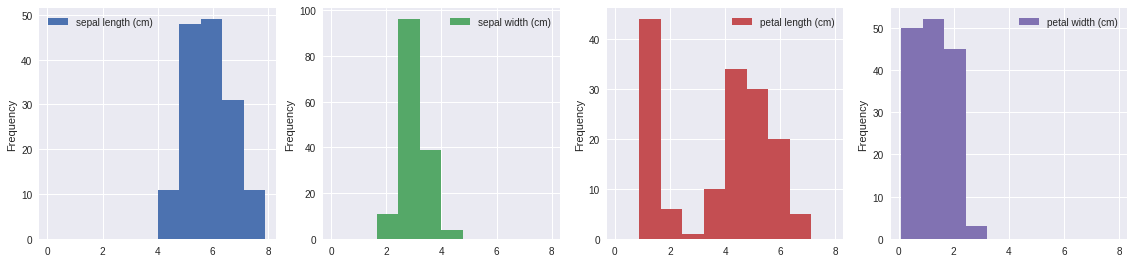

In [0]:
df.plot(subplots=True, kind='hist', layout=(10,10), sharex=False, sharey=False,figsize=(50,50));

In [0]:
from autokeras.tabular import tabular_supervised

In [0]:
model = tabular_supervised.LGBMRegressor()
# model = tabular_supervised.TabularRegressor()

In [0]:
X = df.drop(['petal width (cm)'],axis=1)
y = df['petal width (cm)']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3,random_state=10)

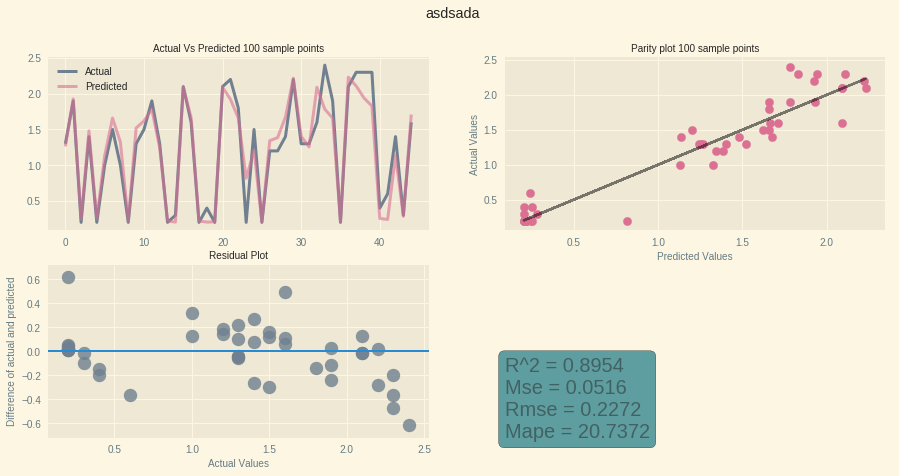

In [0]:
########################################Fitting the data################################################################

res = model.fit(X_train,y_train)


########################################Prediction################################################################

res1 = res.predict(X_test)


########################################PLoting the result################################################################


plt.style.use('Solarize_Light2')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,7))
f.suptitle('asdsada')

ax1.plot(np.array(y_test)[:100],c='slategray',linewidth=3,label='Actual')
ax1.plot(res1[:100],c='palevioletred',linewidth=3,label='Predicted',alpha=0.6)
ax1.set_title('Actual Vs Predicted 100 sample points',fontsize=10)
# ax1.set_ylabel('2GT084-Exhaust gas temperature ',fontsize=10)
ax1.legend()

ax2.scatter(res1[:100],np.array(y_test)[:100],c='palevioletred',s=70)
ax2.plot(res1[:100],res1[:100],c='k',alpha=0.5)
ax2.set_title('Parity plot 100 sample points',fontsize=10)
ax2.set_ylabel('Actual Values',fontsize=10)
ax2.set_xlabel('Predicted Values',fontsize=10)

ax3.scatter(np.array(y_test)[:100],res1[:100]-np.array(y_test)[:100],c='slategray',s=170,alpha=0.8)
ax3.axhline(y=0)
ax3.set_title('Residual Plot',fontsize=10)
ax3.set_xlabel('Actual Values',fontsize=10)
ax3.set_ylabel('Difference of actual and predicted',fontsize=10)

ax4.annotate('R^2 = '+str(round(r2_score(res1,y_test),4))+' \nMse = '+str(round(mean_squared_error(y_test, res1),4))+
             ' \nRmse = '+str(round(np.sqrt(mean_squared_error(y_test, res1)),4))+' \nMape = '+str(round(np.mean(np.abs((y_test - res1) / y_test)) * 100,4)),
             (0,0),fontsize=20,bbox=dict(boxstyle="round", fc="cadetblue"),alpha=0.5)

ax4.axis('off')

# os.makedirs(r'D:\Dynamic\Feb4\Normalised\\svr\\'+str(j))
# plt.savefig(r'D:\Dynamic\Feb4\Normalised\\svr\\'+str(j)+'\\'+str(j)+'.jpeg',dpi=300,facecolor=f.get_facecolor(),layought='tight')
plt.show()


In [0]:
import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(13, input_dim=3,kernel_initializer='normal',activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='linear'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# loss='mse', optimizer='adam', metrics=['mse','mae']

In [0]:
from sklearn.model_selection import GridSearchCV
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(model, param_grid=param_grid, cv=5)
grid.fit(X, y)
grid.best_params_

TypeError: ignored

Train on 84 samples, validate on 21 samples
Epoch 1/500
 - 0s - loss: -6.5527e+00 - acc: 0.0476 - val_loss: -8.3079e+00 - val_acc: 0.0476
Epoch 2/500
 - 0s - loss: -6.5528e+00 - acc: 0.0476 - val_loss: -8.3105e+00 - val_acc: 0.0476
Epoch 3/500
 - 0s - loss: -6.5533e+00 - acc: 0.0476 - val_loss: -8.3111e+00 - val_acc: 0.0476
Epoch 4/500
 - 0s - loss: -6.5529e+00 - acc: 0.0476 - val_loss: -8.3106e+00 - val_acc: 0.0476
Epoch 5/500
 - 0s - loss: -6.5529e+00 - acc: 0.0476 - val_loss: -8.3075e+00 - val_acc: 0.0476
Epoch 6/500
 - 0s - loss: -6.5527e+00 - acc: 0.0476 - val_loss: -8.3099e+00 - val_acc: 0.0476
Epoch 7/500
 - 0s - loss: -6.5531e+00 - acc: 0.0476 - val_loss: -8.3108e+00 - val_acc: 0.0476
Epoch 8/500
 - 0s - loss: -6.5532e+00 - acc: 0.0476 - val_loss: -8.3099e+00 - val_acc: 0.0476
Epoch 9/500
 - 0s - loss: -6.5532e+00 - acc: 0.0476 - val_loss: -8.3095e+00 - val_acc: 0.0476
Epoch 10/500
 - 0s - loss: -6.5531e+00 - acc: 0.0476 - val_loss: -8.3099e+00 - val_acc: 0.0476
Epoch 11/500
 -

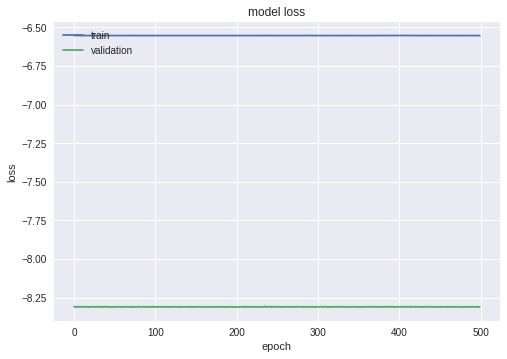

In [0]:
history = model.fit(X_train,y_train,epochs=500,verbose=2,validation_split=0.2)



print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Train on 84 samples, validate on 21 samples
Epoch 1/500
84/84 [==============================] - 1s 12ms/step - loss: 1.7022 - mean_absolute_error: 1.1014 - val_loss: 1.5715 - val_mean_absolute_error: 1.0357
Epoch 2/500
84/84 [==============================] - 0s 195us/step - loss: 1.1217 - mean_absolute_error: 0.8538 - val_loss: 1.1617 - val_mean_absolute_error: 0.8622
Epoch 3/500
84/84 [==============================] - 0s 103us/step - loss: 0.8285 - mean_absolute_error: 0.7205 - val_loss: 0.9096 - val_mean_absolute_error: 0.7577
Epoch 4/500
84/84 [==============================] - 0s 124us/step - loss: 0.6357 - mean_absolute_error: 0.6389 - val_loss: 0.7280 - val_mean_absolute_error: 0.6760
Epoch 5/500
84/84 [==============================] - 0s 119us/step - loss: 0.5024 - mean_absolute_error: 0.5812 - val_loss: 0.6007 - val_mean_absolute_error: 0.6127
Epoch 6/500
84/84 [==============================] - 0s 139us/step - loss: 0.4077 - mean_absolute_error: 0.5300 - val_loss: 0.5043 -

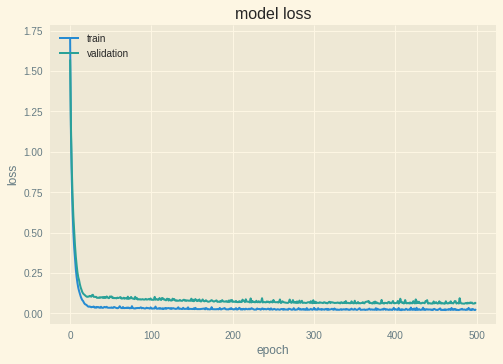

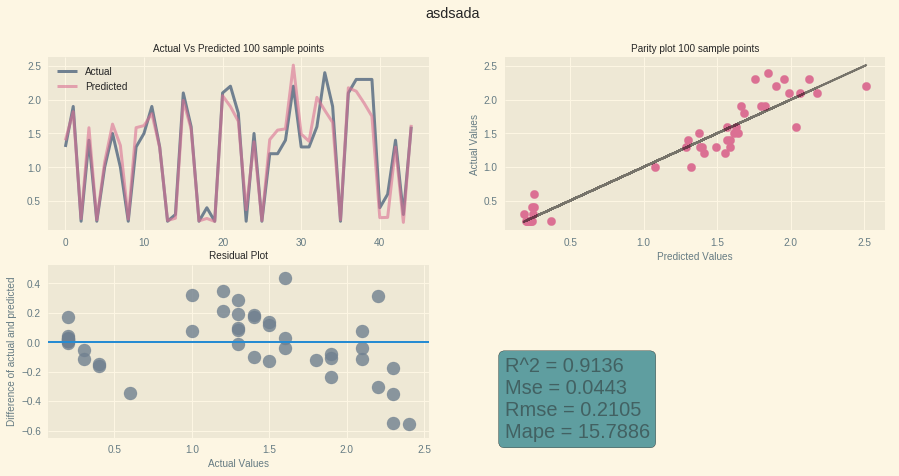

In [0]:
history = model.fit(X_train,y_train,epochs=500,validation_split=0.2)



print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

########################################Prediction################################################################

res1 = model.predict(X_test)



plt.style.use('Solarize_Light2')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,7))
f.suptitle('asdsada')

ax1.plot(np.array(y_test)[:100],c='slategray',linewidth=3,label='Actual')
ax1.plot(res1[:100],c='palevioletred',linewidth=3,label='Predicted',alpha=0.6)
ax1.set_title('Actual Vs Predicted 100 sample points',fontsize=10)
# ax1.set_ylabel('2GT084-Exhaust gas temperature ',fontsize=10)
ax1.legend()

ax2.scatter(res1[:100],np.array(y_test)[:100],c='palevioletred',s=70)
ax2.plot(res1[:100],res1[:100],c='k',alpha=0.5)
ax2.set_title('Parity plot 100 sample points',fontsize=10)
ax2.set_ylabel('Actual Values',fontsize=10)
ax2.set_xlabel('Predicted Values',fontsize=10)

ax3.scatter(np.array(y_test)[:100],res1[:100]-np.array(y_test)[:100],c='slategray',s=170,alpha=0.8)
ax3.axhline(y=0)
ax3.set_title('Residual Plot',fontsize=10)
ax3.set_xlabel('Actual Values',fontsize=10)
ax3.set_ylabel('Difference of actual and predicted',fontsize=10)

ax4.annotate('R^2 = '+str(round(r2_score(res1,y_test),4))+' \nMse = '+str(round(mean_squared_error(y_test, res1),4))+
             ' \nRmse = '+str(round(np.sqrt(mean_squared_error(y_test, res1)),4))+' \nMape = '+str(round(np.mean(np.abs((y_test - res1) / y_test)) * 100,4)),
             (0,0),fontsize=20,bbox=dict(boxstyle="round", fc="cadetblue"),alpha=0.5)

ax4.axis('off')

# os.makedirs(r'D:\Dynamic\Feb4\Normalised\\svr\\'+str(j))
# plt.savefig(r'D:\Dynamic\Feb4\Normalised\\svr\\'+str(j)+'\\'+str(j)+'.jpeg',dpi=300,facecolor=f.get_facecolor(),layought='tight')
plt.show()


In [0]:
y_test = np.reshape(y_test,(-1,1))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [0]:
res1.shape,y_test.shape,c.shape

((45, 1), (45,), (45, 1))

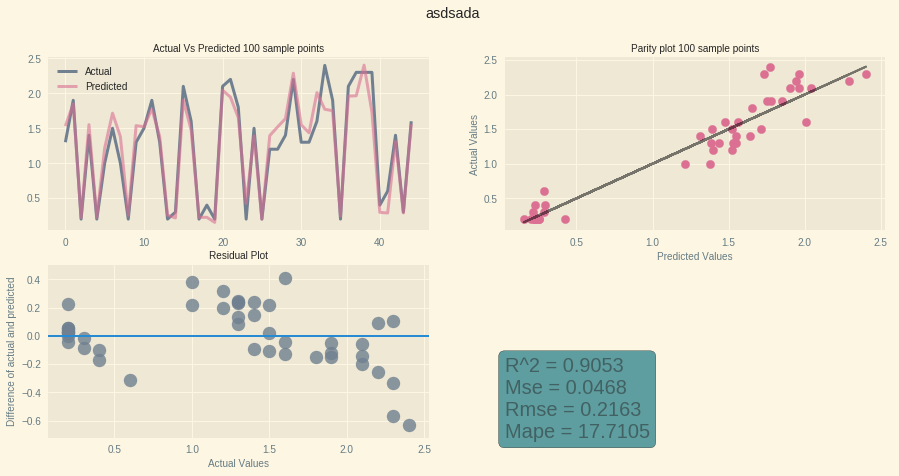

In [0]:
plt.style.use('Solarize_Light2')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,7))
f.suptitle('asdsada')

ax1.plot(np.array(y_test)[:100],c='slategray',linewidth=3,label='Actual')
ax1.plot(res1[:100],c='palevioletred',linewidth=3,label='Predicted',alpha=0.6)
ax1.set_title('Actual Vs Predicted 100 sample points',fontsize=10)
# ax1.set_ylabel('2GT084-Exhaust gas temperature ',fontsize=10)
ax1.legend()

ax2.scatter(res1[:100],np.array(y_test)[:100],c='palevioletred',s=70)
ax2.plot(res1[:100],res1[:100],c='k',alpha=0.5)
ax2.set_title('Parity plot 100 sample points',fontsize=10)
ax2.set_ylabel('Actual Values',fontsize=10)
ax2.set_xlabel('Predicted Values',fontsize=10)

ax3.scatter(np.array(y_test)[:100],res1[:100]-np.array(y_test)[:100],c='slategray',s=170,alpha=0.8)
ax3.axhline(y=0)
ax3.set_title('Residual Plot',fontsize=10)
ax3.set_xlabel('Actual Values',fontsize=10)
ax3.set_ylabel('Difference of actual and predicted',fontsize=10)

ax4.annotate('R^2 = '+str(round(r2_score(res1,y_test),4))+' \nMse = '+str(round(mean_squared_error(y_test, res1),4))+
             ' \nRmse = '+str(round(np.sqrt(mean_squared_error(y_test, res1)),4))+' \nMape = '+str(round(np.mean(np.abs((y_test - res1) / y_test)) * 100,4)),
             (0,0),fontsize=20,bbox=dict(boxstyle="round", fc="cadetblue"),alpha=0.5)

ax4.axis('off')

# os.makedirs(r'D:\Dynamic\Feb4\Normalised\\svr\\'+str(j))
# plt.savefig(r'D:\Dynamic\Feb4\Normalised\\svr\\'+str(j)+'\\'+str(j)+'.jpeg',dpi=300,facecolor=f.get_facecolor(),layought='tight')
plt.show()


In [0]:
from autokeras.pretrained import ObjectDetector

if __name__ == '__main__':
    detector = ObjectDetector()
    detector.load()
    results = detector.predict("RoadToDataScientist1_prediction.png", output_file_path="./")

    print(results)

/usr/local/lib/python3.6/dist-packages/autokeras/pretrained/object_detector.py:110: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  self.priors = Variable(self.priorbox.forward(), volatile=True).to(self.device)
/usr/local/lib/python3.6/dist-packages/autokeras/pretrained/object_detector.py:269: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(self.weight, self.gamma)


Finished loading model!
[{'left': 12, 'top': 57, 'width': 436, 'height': 315, 'category': 'tvmonitor', 'confidence': 0.9749622344970703}]


<Figure size 576x396 with 0 Axes>

In [0]:
from autokeras.pretrained import VoiceGenerator
import os

text = "There are many variations of passages of Lorem Ipsum available, but the majority have suffered "
# alteration in some form, by injected humour, or randomised words which don't look even slightly believable. If you are going to use a passage of Lorem Ipsum, you need to be sure there isn't anything embarrassing hidden in the middle of text. All the Lorem Ipsum generators on the Internet tend to repeat predefined chunks as necessary, making this the first true generator on the Internet. It uses a dictionary of over 200 Latin words, combined with a handful of model sentence structures, to generate Lorem Ipsum which looks reasonable. The generated Lorem Ipsum is therefore always free from repetition, injected humour, or non-characteristic words etc."
voice_generator = VoiceGenerator()
voice_generator.generate(text,path='test1.wav')


Load checkpoint from: /tmp/autokeras/20180505_deepvoice3_checkpoint_step000640000.pth


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
text

"There are many variations of passages of Lorem Ipsum available, but the majority have suffered alteration\nin some form, by injected humour, or randomised words which don't look even slightly believable. If you are going \nto use a passage of Lorem Ipsum, you need to be sure there isn't anything embarrassing hidden in the middle of text.\nAll the Lorem Ipsum generators on the Internet tend to repeat predefined chunks as necessary, making this the first \ntrue generator on the Internet. It uses a dictionary of over 200 Latin words, combined with a handful of model sentence\nstructures, to generate Lorem Ipsum which looks reasonable. The generated Lorem Ipsum is therefore always free from \nrepetition, injected humour, or non-characteristic words etc."

In [0]:
save_name

'test_8.wav'

In [0]:
import numpy as np
from autokeras import TabularRegressor

if __name__ == '__main__':
    ntime, nnum, ncat = 4, 10, 8
    nsample = 1000
    x_num = np.random.random([nsample, nnum])
    x_time = np.random.random([nsample, ntime])
    x_cat = np.random.randint(0, 10, [nsample, ncat])

    x_all = np.concatenate([x_num, x_time, x_cat], axis=1)
    x_train = x_all[:int(nsample * 0.8), :]
    x_test = x_all[int(nsample * 0.8):, :]

    y_all = np.random.random(nsample)
    y_train = y_all[:int(nsample * 0.8)]
    y_test = y_all[int(nsample * 0.8):]

    clf = tabu
    datainfo = np.array(['TIME'] * ntime + ['NUM'] * nnum + ['CAT'] * ncat)
    clf.fit(x_train, y_train, time_limit=12 * 60 * 60, data_info=datainfo)

    MSE = clf.evaluate(x_test, y_test)
    print(MSE)

ImportError: ignored

In [0]:
import cv2

camera = cv2.VideoCapture(0)

return_value, image = camera.read()
cv2.imwrite('opencv.png', image)

del(camera)

In [0]:
autokeras.tabular.re

In [0]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
df

In [0]:
X = df['sepal length (cm)']
y = df['petal width (cm)']

In [0]:
model = sm.GLS(y,X).fit()

In [0]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized least squares
=================================================================
Model:              GLS              Adj. R-squared:     0.805   
Dependent Variable: petal width (cm) AIC:                286.9457
Date:               2019-02-23 08:51 BIC:                289.9564
No. Observations:   150              Log-Likelihood:     -142.47 
Df Model:           1                F-statistic:        618.4   
Df Residuals:       149              Prob (F-statistic): 6.72e-55
R-squared:          0.806            Scale:              0.39394 
-----------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
-----------------------------------------------------------------
sepal length (cm)    0.2160   0.0087 24.8686 0.0000 0.1988 0.2331
-----------------------------------------------------------------
Omnibus:               66.118       Durbin-Watson:          0.197
Prob(Omnibus):         0.000        Jarque-Bera (JB):       9.293
Skew:                  -0.053       Prob(JB):               0.010
Kurtosis:              1.785        Condition No.:          1    
=================================================================

"""

In [0]:
y_true = model.predict(X)

In [0]:

from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [0]:
prstd, iv_l, iv_u = wls_prediction_std(model)

AttributeError: ignored

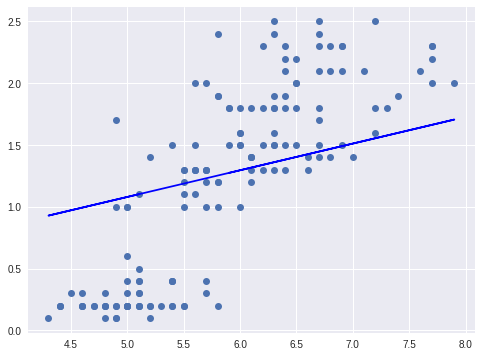

In [0]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, y, 'o', )
ax.plot(X, y_true, 'b-', label="True")
# ax.plot(X, model.fittedvalues, 'r--.', label="OLS")
# ax.plot(X, iv_u, 'r--')
# ax.plot(X, iv_l, 'r--')
# ax.legend(loc='best');
plt.show()

In [0]:
model1 = LinearRegression()
model1.fit(X.values.reshape(-1,1),y)
pre = model.predict(X)

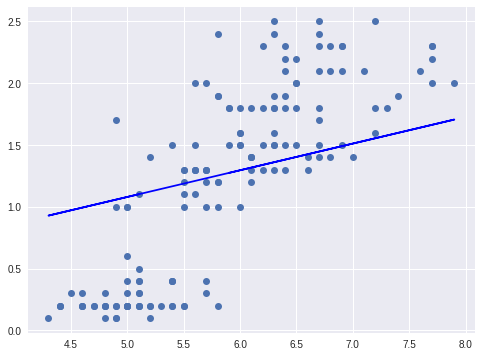

In [0]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, y, 'o', )
ax.plot(X, pre, 'b-', label="True")